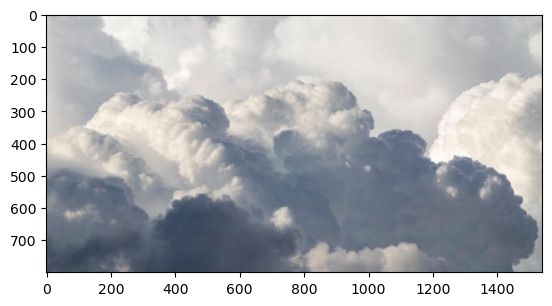

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Load an image
img = cv2.imread('C:\\Users\\damir\\Downloads\\dataset\\alien_test\\Cloud_1.png')

# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img)
plt.show()


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
root_dir = "C:\\Users\\damir\\Downloads\\dataset"
os.listdir(root_dir)

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

In [4]:
foggy = "C:\\Users\\damir\\Downloads\\dataset\\foggy"
sunrise = "C:\\Users\\damir\\Downloads\\dataset\\sunrise"
shine = "C:\\Users\\damir\\Downloads\\dataset\\shine"
rainy = "C:\\Users\\damir\\Downloads\\dataset\\rainy"
cloudy = "C:\\Users\\damir\\Downloads\\dataset\\cloudy"
test = "C:\\Users\\damir\\Downloads\\dataset\\test"

In [5]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [6]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [7]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 467.08it/s]


In [8]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape


((1498, 150, 150, 3), (1498,))

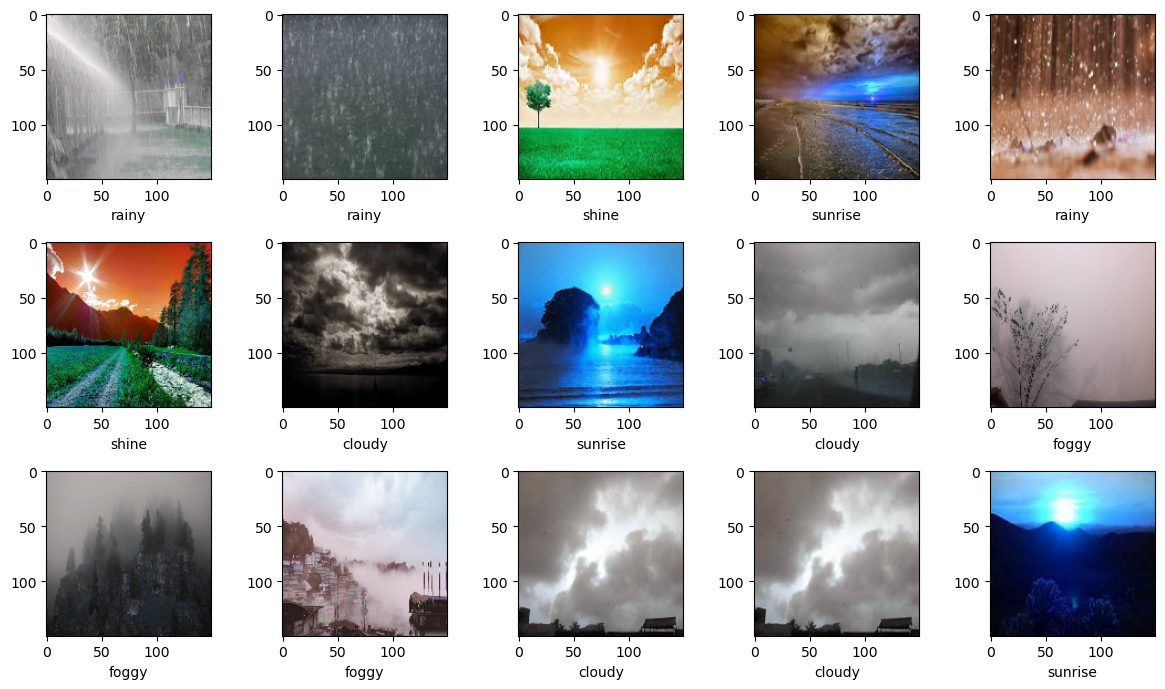

In [9]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [10]:
foggy2 = "C:\\Users\\damir\\Downloads\\dataset_mine\\foggy"
sunrise2 = "C:\\Users\\damir\\Downloads\\dataset_mine\\sunrise"
shine2 = "C:\\Users\\damir\\Downloads\\dataset_mine\\shine"
rainy2 = "C:\\Users\\damir\\Downloads\\dataset_mine\\rainy"
cloudy2 = "C:\\Users\\damir\\Downloads\\dataset_mine\\cloudy"

In [11]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy2))}")
print(f"Sunrise: {len(os.listdir(sunrise2))}")
print(f"Shine: {len(os.listdir(shine2))}")
print(f"Rainy: {len(os.listdir(rainy2))}")
print(f"Cloudy: {len(os.listdir(cloudy2))}")

Number of Images in Each Directory:
Foggy: 8
Sunrise: 1
Shine: 1
Rainy: 6
Cloudy: 1


In [12]:
x2 = []
y2 = [] 
dataset2 =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x2.append(img)
        y2.append(dir_name)
    return x2,y2

In [13]:
x2,y2= create_dataset(foggy2,"foggy2")
x2,y2= create_dataset(sunrise2,"sunrise2")
x2,y2= create_dataset(shine2,"shine2")
x2,y2= create_dataset(rainy2,"rainy2")
x2,y2= create_dataset(cloudy2,"cloudy2")

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.23it/s]


In [14]:
x2 =  np.array(x2)
y2 = np.array(y2)
x2.shape,y2.shape


((17, 150, 150, 3), (17,))

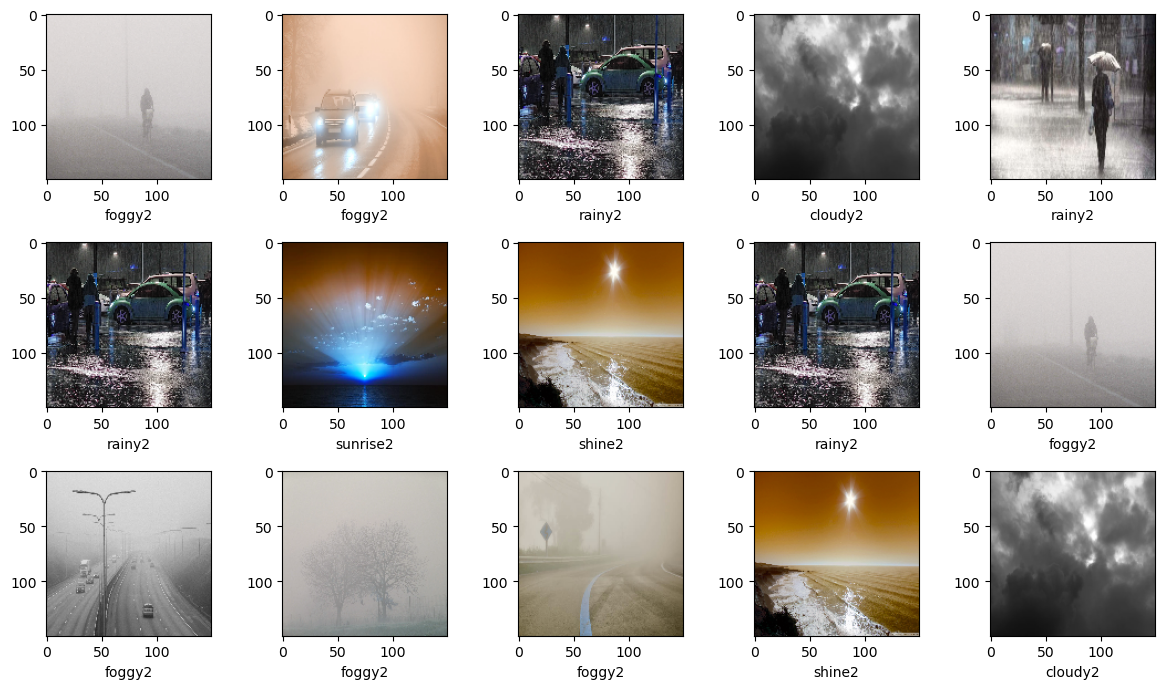

In [15]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample2 =  random.choice(range(len(x2)))
    image2 = x2[sample2]
    category2 = y2[sample2]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image2)
    plt.xlabel(category2)
    
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [19]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [20]:
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

In [21]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

In [22]:
for layer in vgg.layers:
    layer.trainable = False

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 5)                 40965     
                                                                 
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [26]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [4792 1198]


In [27]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
38/38 [==============================] - ETA: 0s - loss: 0.9062 - accuracy: 0.6803
Epoch 1: val_accuracy improved from -inf to 0.83667, saving model to vgg19.h5
38/38 [==============================] - 78s 2s/step - loss: 0.9062 - accuracy: 0.6803 - val_loss: 0.5546 - val_accuracy: 0.8367
Epoch 2/15
38/38 [==============================] - ETA: 0s - loss: 0.4331 - accuracy: 0.8648
Epoch 2: val_accuracy improved from 0.83667 to 0.86333, saving model to vgg19.h5
38/38 [==============================] - 77s 2s/step - loss: 0.4331 - accuracy: 0.8648 - val_loss: 0.4319 - val_accuracy: 0.8633
Epoch 3/15
38/38 [==============================] - ETA: 0s - loss: 0.3134 - accuracy: 0.9182
Epoch 3: val_accuracy improved from 0.86333 to 0.86667, saving model to vgg19.h5
38/38 [==============================] - 78s 2s/step - loss: 0.3134 - accuracy: 0.9182 - val_loss: 0.4254 - val_accuracy: 0.8667
Epoch 4/15
38/38 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.94

In [28]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

10/10 [==============================] - 17s 2s/step - loss: 0.2595 - accuracy: 0.8967
Loss: 0.25952550768852234
Accuracy: 0.8966666460037231


In [29]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred[:15])

10/10 [==============================] - 18s 2s/step
[2 0 0 0 3 3 2 3 4 1 1 2 0 0 1]


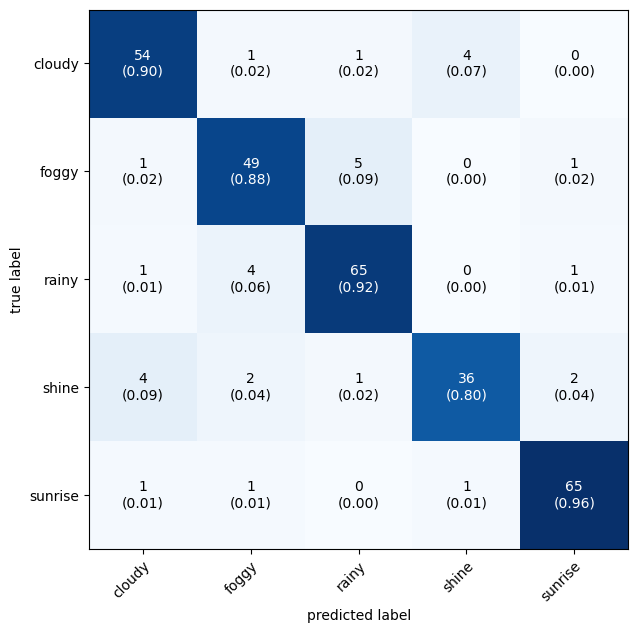

In [30]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);

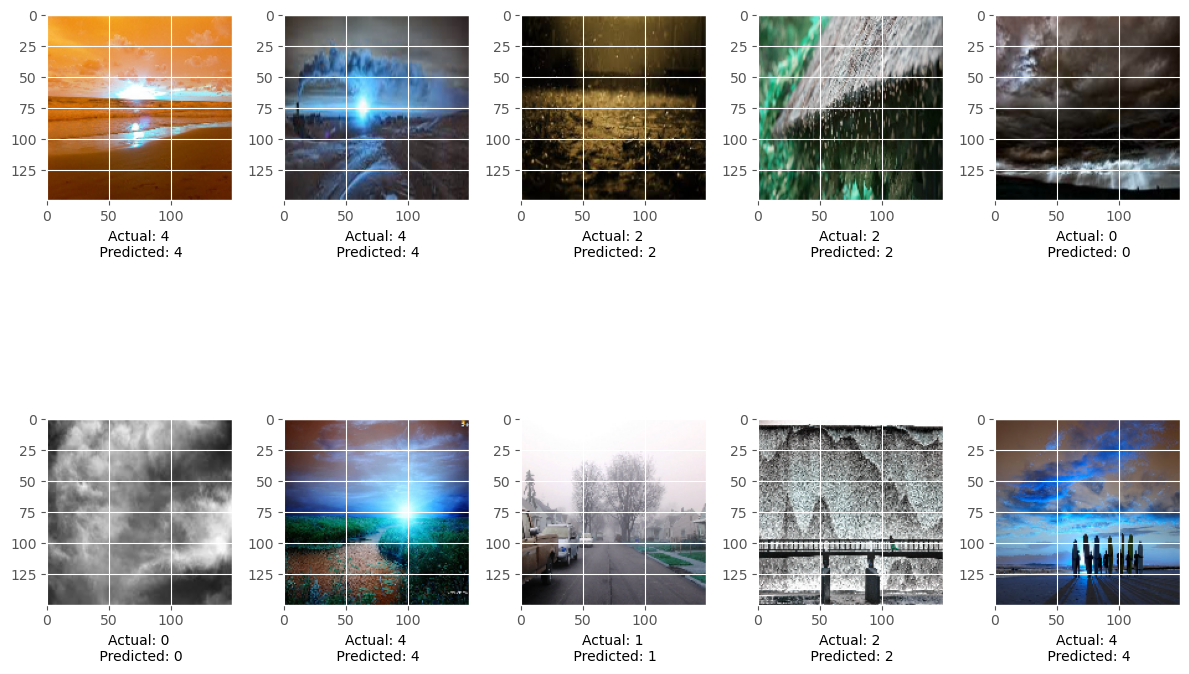

In [31]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show() 

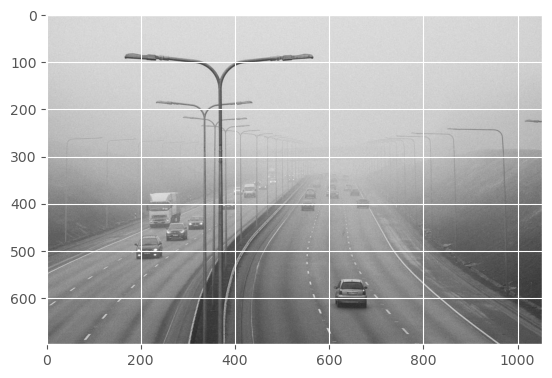

In [32]:
from PIL import Image
img2 = Image.open("C:\\Users\\damir\\Downloads\\dataset_mine\\foggy\\foggy01.jpg")  # replace with your own image path
plt.imshow(img2)
plt.show()


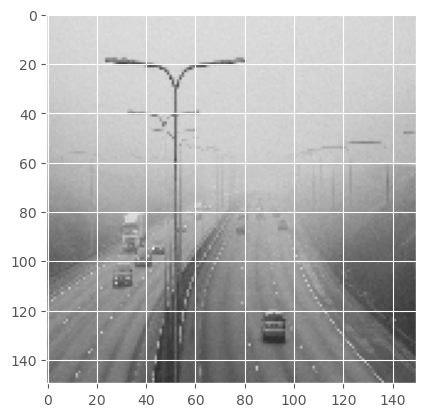

In [36]:
img2 = np.array(img2)
img2 = cv2.resize(img2,(150,150))
plt.imshow(img2)
plt.show()